# Deep Learing Model

In [121]:

# Imports
from pathlib import Path
import hvplot.pandas
import matplotlib
import pandas as pd
import numpy as np


In [122]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.decomposition import PCA

In [123]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [124]:
# date to split the data
# we use this date as the point where we want to use the model to predict
split_date = "2022-01-01"

In [125]:
#read in the data from a CSV file 
dataframe = pd.read_csv(Path("./combined_data_shifted_time.csv"), index_col= "Date", parse_dates= True).dropna()
dataframe.tail()

,Jets_Shifted,Oil,USD,Cheap,Flights,Best airlines,Travel,luggage,luggage weight,suitcase,carry on,precheck,RV,train,bus,car,road,Jets
Date,,,,,,,,,,,,,,,,,,
2022-12-23,-1.338432,0.576896,1.681854,-0.874344,-0.215749,0.0,-0.782521,0.31513,0.489499,0.641258,0.681619,1.29669,-3.193744,0.409537,-0.064755,-1.311285,-0.574096,-1.377802
2022-12-27,-1.386750,0.637598,1.685902,-0.874344,-0.215749,0.0,-0.782521,0.31513,0.489499,0.641258,0.681619,1.29669,-3.193744,0.409537,-0.064755,-1.311285,-0.574096,-1.417171
2022-12-28,-1.374223,0.655756,1.534131,-0.874344,-0.215749,0.0,-0.782521,0.31513,0.489499,0.641258,0.681619,1.29669,-3.193744,0.409537,-0.064755,-1.311285,-0.574096,-1.490542
2022-12-29,-1.333064,0.780271,1.572581,-0.874344,-0.215749,0.0,-0.782521,0.31513,0.489499,0.641258,0.681619,1.29669,-3.193744,0.409537,-0.064755,-1.311285,-0.574096,-1.411803
2022-12-30,-1.399276,0.770932,1.627217,-0.874344,-0.215749,0.0,-0.782521,0.31513,0.489499,0.641258,0.681619,1.29669,-3.193744,0.409537,-0.064755,-1.311285,-0.574096,-1.404645


In [126]:
#split the data into the X training 
X_train = dataframe.loc[dataframe.index<split_date].copy()
X_train.drop("Jets", axis=1, inplace=True)
X_train.tail()


,Jets_Shifted,Oil,USD,Cheap,Flights,Best airlines,Travel,luggage,luggage weight,suitcase,carry on,precheck,RV,train,bus,car,road
Date,,,,,,,,,,,,,,,,,
2021-12-27,-0.900586,0.383690,0.036655,-0.874344,-0.629192,0.0,3.307819,-0.645728,-0.160073,-0.318914,-0.223704,0.118646,0.313112,-0.768987,-0.585775,-0.883593,-0.574096
2021-12-28,-0.907697,0.267372,0.032608,-0.874344,-0.629192,0.0,3.307819,-0.645728,-0.160073,-0.318914,-0.223704,0.118646,0.313112,-0.768987,-0.585775,-0.883593,-0.574096
2021-12-29,-0.721046,0.401538,0.020466,-0.874344,-0.629192,0.0,3.307819,-0.645728,-0.160073,-0.318914,-0.223704,0.118646,0.313112,-0.768987,-0.585775,-0.883593,-0.574096
2021-12-30,-0.694383,0.486623,-0.062502,-0.874344,-0.629192,0.0,3.307819,-0.645728,-0.160073,-0.318914,-0.223704,0.118646,0.313112,-0.768987,-0.585775,-0.883593,-0.574096
2021-12-31,-0.635149,0.540061,-0.074645,-0.874344,-0.629192,0.0,3.307819,-0.645728,-0.160073,-0.318914,-0.223704,0.118646,0.313112,-0.768987,-0.585775,-0.883593,-0.574096


In [127]:
#split the data into the y training 
y_train = dataframe.loc[dataframe.index< split_date,['Jets']]
y_train.tail()

,Jets
Date,
2021-12-27,-0.642307
2021-12-28,-0.620833
2021-12-29,-0.678098
2021-12-30,-0.679888
2021-12-31,-0.687045


In [128]:
#split the data into the X test, this is the full dataset without the y variable
X_test = dataframe.copy()
X_test.drop("Jets", axis=1, inplace=True)
X_test.tail()


,Jets_Shifted,Oil,USD,Cheap,Flights,Best airlines,Travel,luggage,luggage weight,suitcase,carry on,precheck,RV,train,bus,car,road
Date,,,,,,,,,,,,,,,,,
2022-12-23,-1.338432,0.576896,1.681854,-0.874344,-0.215749,0.0,-0.782521,0.31513,0.489499,0.641258,0.681619,1.29669,-3.193744,0.409537,-0.064755,-1.311285,-0.574096
2022-12-27,-1.386750,0.637598,1.685902,-0.874344,-0.215749,0.0,-0.782521,0.31513,0.489499,0.641258,0.681619,1.29669,-3.193744,0.409537,-0.064755,-1.311285,-0.574096
2022-12-28,-1.374223,0.655756,1.534131,-0.874344,-0.215749,0.0,-0.782521,0.31513,0.489499,0.641258,0.681619,1.29669,-3.193744,0.409537,-0.064755,-1.311285,-0.574096
2022-12-29,-1.333064,0.780271,1.572581,-0.874344,-0.215749,0.0,-0.782521,0.31513,0.489499,0.641258,0.681619,1.29669,-3.193744,0.409537,-0.064755,-1.311285,-0.574096
2022-12-30,-1.399276,0.770932,1.627217,-0.874344,-0.215749,0.0,-0.782521,0.31513,0.489499,0.641258,0.681619,1.29669,-3.193744,0.409537,-0.064755,-1.311285,-0.574096


In [129]:
X_test.shape

(1395, 17)

In [130]:
#split the data into the y test, this is the y-variable for the full timespan 
y_test = dataframe.loc[:,['Jets']]
y_test.tail()

,Jets
Date,
2022-12-23,-1.377802
2022-12-27,-1.417171
2022-12-28,-1.490542
2022-12-29,-1.411803
2022-12-30,-1.404645


In [131]:
# Build the neural network layers
model = Sequential()
model.add(Dense(17, input_dim=17, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1))

In [132]:
#compile the model 
model.compile(loss="mean_absolute_error", 
              optimizer= "adam")

In [133]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 17)                306       
                                                                 
 dense_19 (Dense)            (None, 5)                 90        
                                                                 
 dense_20 (Dense)            (None, 1)                 6         
                                                                 
Total params: 402
Trainable params: 402
Non-trainable params: 0
_________________________________________________________________


In [134]:
#run the model 
model_data = model.fit(X_train,y_train, epochs= 500)

Epoch 1/1000
36/36 [==============================] - 2s 3ms/step - loss: 0.5662
Epoch 2/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.3050
Epoch 3/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.2275
Epoch 4/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.1983
Epoch 5/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.1807
Epoch 6/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.1676
Epoch 7/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.1577
Epoch 8/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.1517
Epoch 9/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.1482
Epoch 10/1000
36/36 [==============================] - 0s 4ms/step - loss: 0.1439
Epoch 11/1000
36/36 [==============================] - 0s 5ms/step - loss: 0.1421
Epoch 12/1000
36/36 [==============================] - 0s 5ms/step - loss: 0.1391
Epoch 13/1000
36/36 [====

In [135]:
#generate the prediction with the model 
model_output= model.predict(X_test)

44/44 [==============================] - 0s 4ms/step


In [136]:
#build the datafram to plot the data
df_plot_data =y_test.copy() 
df_plot_data["pred"] = model_output
df_plot_data.head()

,Jets,pred
Date,,
2017-06-08,0.973018,0.921758
2017-06-09,0.943821,0.964049
2017-06-12,0.899166,0.960016
2017-06-13,0.914623,0.966408
2017-06-14,0.907754,0.973436


<AxesSubplot:xlabel='Date'>

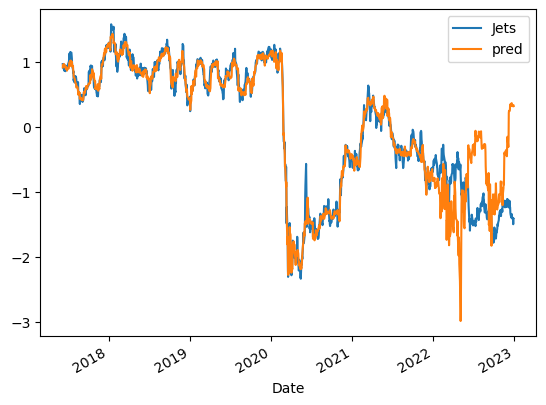

In [137]:
#Plot the data
df_plot_data.plot()


In [138]:
#build the loss chart data
df = pd.DataFrame(model_data.history, index=range(1, len(model_data.history["loss"]) + 1))

<AxesSubplot:>

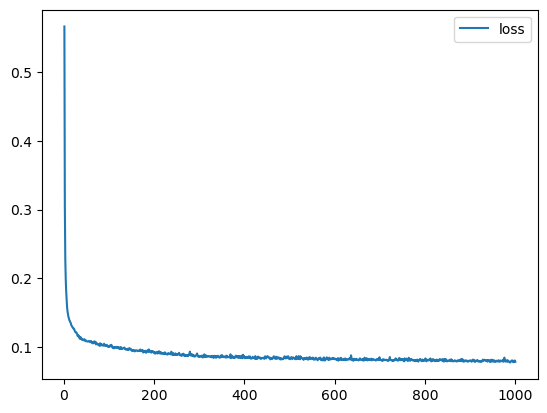

In [139]:
#build the loss chart 
df.plot()